In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

from sklearn.experimental import enable_iterative_imputer

from sklearn import impute

from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

In [2]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [3]:
miss_vals = ["na"]

In [4]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

In [5]:
ca1.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [6]:
ca1 = pd.get_dummies(ca1)

In [7]:
ca1.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg,class_pos
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1,0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1,0


In [8]:
ca1.drop(columns = "class_pos", inplace = True)

ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [9]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [10]:
ca1_d = ca1.drop(["ab_000", "bm_000", "bn_000", "bo_000", "bp_000", "bq_000", "br_000",
                        "cr_000"], axis = 1)

ca1_d.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,1
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,1
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,1


In [11]:
ca1_split = ca1_d.drop(["class_neg"], axis = 1)

ca1_split.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [12]:
class_ca1 = ca1_d[["class_neg"]]

class_ca1.head()

,class_neg
0,1
1,1
2,1
3,1
4,1


In [13]:
X = ca1_split

y = class_ca1

In [14]:
imputer = KNNImputer(n_neighbors = 5)


In [15]:
X = imputer.fit_transform(X)


X.fillna(X.median(), inplace = True)

imputer = IterativeImputer(max_iter = 5, random_state = 50)

imputer.fit(X)

X = imputer.transform(X)

In [16]:
tr = Normalizer()

X_scaled = tr.fit_transform(X)

In [17]:
pca = PCA()

pca.fit(X_scaled)

PCA()

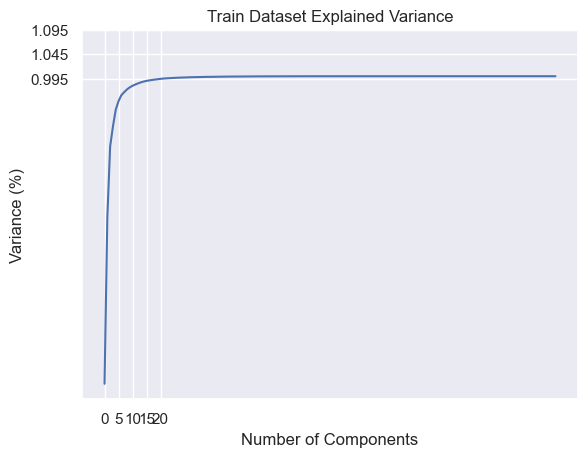

In [18]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 25, 5))
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.995, 1.1, 0.05))
plt.title("Train Dataset Explained Variance")
plt.show()

In [19]:
pca = PCA(n_components = 15)

ca1_pca = pca.fit_transform(X_scaled)

In [20]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.863789,-0.432192,-0.045922,-0.007242,0.010876,-0.016151,0.000394,-0.003680,-0.001438,0.002709,0.001468,-0.000602,-0.002378,0.002471,0.000520
1,-0.504935,-0.282754,-0.162972,0.163815,-0.036087,-0.057187,-0.057719,-0.067022,0.022404,-0.037135,0.025201,0.074520,0.024095,0.030582,0.001424
2,-0.478251,-0.251572,-0.335302,-0.169384,-0.018444,-0.062044,0.031116,0.032296,0.006907,0.035343,-0.009970,-0.069047,0.027586,-0.119256,0.052498
3,0.197031,0.810077,-0.010218,0.018827,-0.047021,0.008724,-0.051482,0.027986,0.008410,0.019036,-0.000252,0.008577,-0.009999,-0.010469,0.007076
4,-0.416814,-0.290252,0.485885,-0.128748,-0.073013,-0.016621,0.030037,-0.099088,0.015165,0.060479,-0.057553,0.024820,-0.006952,0.024759,-0.003339


In [21]:
ca1_concat = pd.concat([ca1_pca, y[["class_neg"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,class_neg
0,0.863789,-0.432192,-0.045922,-0.007242,0.010876,-0.016151,0.000394,-0.003680,-0.001438,0.002709,0.001468,-0.000602,-0.002378,0.002471,0.000520,1
1,-0.504935,-0.282754,-0.162972,0.163815,-0.036087,-0.057187,-0.057719,-0.067022,0.022404,-0.037135,0.025201,0.074520,0.024095,0.030582,0.001424,1
2,-0.478251,-0.251572,-0.335302,-0.169384,-0.018444,-0.062044,0.031116,0.032296,0.006907,0.035343,-0.009970,-0.069047,0.027586,-0.119256,0.052498,1
3,0.197031,0.810077,-0.010218,0.018827,-0.047021,0.008724,-0.051482,0.027986,0.008410,0.019036,-0.000252,0.008577,-0.009999,-0.010469,0.007076,1
4,-0.416814,-0.290252,0.485885,-0.128748,-0.073013,-0.016621,0.030037,-0.099088,0.015165,0.060479,-0.057553,0.024820,-0.006952,0.024759,-0.003339,1


In [22]:
ca1_array = ca1_concat.values

In [23]:
X = ca1_array[:,0:15]

y = ca1_array[:,15]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [25]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [26]:
from sklearn import svm

In [27]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

In [28]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_svm)) )

accuracy: 0.9821666666666666
accuracy: 0.98


In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       214
         1.0       0.98      1.00      0.99     11786

    accuracy                           0.98     12000
   macro avg       0.49      0.50      0.50     12000
weighted avg       0.96      0.98      0.97     12000



/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

In [32]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_knn)) )

accuracy: 0.9843333333333333
accuracy: 0.98


In [33]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.65      0.27      0.38       214
         1.0       0.99      1.00      0.99     11786

    accuracy                           0.98     12000
   macro avg       0.82      0.63      0.68     12000
weighted avg       0.98      0.98      0.98     12000



In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [35]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_dt)) )

Accuracy: 0.981
Accuracy: 0.98


In [37]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.47      0.49      0.48       214
         1.0       0.99      0.99      0.99     11786

    accuracy                           0.98     12000
   macro avg       0.73      0.74      0.73     12000
weighted avg       0.98      0.98      0.98     12000



In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred_gnb = nvclassifier.predict(X_test)

print(y_pred_gnb)

[1. 1. 1. ... 1. 1. 1.]


In [48]:
y_compare = np.vstack((y_test,y_pred_gnb)).T

y_compare[:30,:]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [49]:
score = accuracy_score(y_test, y_pred_gnb)
print(score)

0.9255833333333333


In [50]:
nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean()

0.9249833333333335

In [52]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_dt))

print("Accuracy GNB:", accuracy_score(y_test, y_pred_gnb))

print("Accuracy GNB_CV:", cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean())

Accuracy SVM: 0.9821666666666666
Accuracy KNN: 0.9843333333333333
Accuracy DT: 0.981
Accuracy GNB: 0.9255833333333333
Accuracy GNB_CV: 0.9249833333333335
